# 필수과제 - 최종 데이터 분석 리포팅 과제

---

### 패키지 import

In [60]:
import pandas as pd
import numpy as np

### 데이터 불러오기

In [2]:
air = pd.read_csv('airplane.csv')

In [3]:
air

,ID,Month,Day_of_Month,Estimated_Departure_Time,Estimated_Arrival_Time,Cancelled,Diverted,Origin_Airport,Origin_Airport_ID,Origin_State,Destination_Airport,Destination_Airport_ID,Destination_State,Distance,Airline,Carrier_Code(IATA),Carrier_ID(DOT),Tail_Number,Delay
0,TRAIN_000000,4,15,NaN,NaN,0,0,OKC,13851,Oklahoma,HOU,12191,Texas,419.0,Southwest Airlines Co.,WN,19393.0,N7858A,NaN
1,TRAIN_000001,8,15,740.0,1024.0,0,0,ORD,13930,Illinois,SLC,14869,Utah,1250.0,SkyWest Airlines Inc.,UA,20304.0,N125SY,NaN
2,TRAIN_000002,9,6,1610.0,1805.0,0,0,CLT,11057,North Carolina,LGA,12953,New York,544.0,American Airlines Inc.,AA,19805.0,N103US,NaN
3,TRAIN_000003,7,10,905.0,1735.0,0,0,LAX,12892,California,EWR,11618,New Jersey,2454.0,United Air Lines Inc.,UA,NaN,N595UA,NaN
4,TRAIN_000004,1,11,900.0,1019.0,0,0,SFO,14771,California,ACV,10157,California,250.0,SkyWest Airlines Inc.,UA,20304.0,N161SY,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,TRAIN_999995,9,18,936.0,1243.0,0,0,ORD,13930,NaN,PHL,14100,NaN,678.0,United Air Lines Inc.,UA,19977.0,N477UA,NaN
999996,TRAIN_999996,5,30,920.0,1028.0,0,0,FAR,11637,NaN,MSP,13487,Minnesota,223.0,SkyWest Airlines Inc.,DL,NaN,N439SW,NaN
999997,TRAIN_999997,6,28,800.0,1340.0,0,0,OAK,13796,NaN,HOU,12191,Texas,1642.0,Southwest Airlines Co.,WN,19393.0,N230WN,NaN
999998,TRAIN_999998,9,27,1613.0,1824.0,0,0,BNA,10693,Tennessee,ATL,10397,NaN,214.0,Delta Air Lines Inc.,DL,19790.0,N968DL,NaN


## 1) EDA 
- 시각화 통한 인사이트 정리
- Delay에 따른 변수들의 시각화 필수

#### 1-1) 데이터의 열별 정보 확인
#### 1-2) 변수 간 상관관계 확인
#### 1-3) 변수별 분포 확인

---

### 1-1) 데이터의 열별 정보 확인

In [61]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

#경고 메시지 숨기기
import warnings
warnings.filterwarnings(action='ignore')

- ID: 샘플 고유 id
- (항공편 운항 관련 정보)
- Month: 해당 항공편의 출발 월
- Day_of_Month: Month에 해당하는 월의 날짜
- Estimated_Departure_Time: 전산 시스템을 바탕으로 측정된 비행기의 출발 시간 (HH:MM 형식)
- Estimated_Arrival_Time: 전산 시스템을 바탕으로 측정된 비행기의 도착 시간 (HH:MM 형식)
- Cancelled: 해당 항공편의 취소 여부 (0: 취소되지 않음, 1: 취소됨)
- Diverted: 해당 항공편의 경유 여부 (0: 취소되지 않음, 1: 취소됨)
- Origin_Airport: 해당 항공편 출발 공항의 고유 코드 (IATA 공항 코드)
- Origin_Airport_ID: 해당 항공편 출발 공항의 고유 ID (US DOT ID)
- Origin_State: 해당 항공편 출발 공항이 위치한 주의 이름
- Destination_Airport: 해당 항공편 도착 공항의 고유 코드 (IATA 공항 코드)
- Destination_Airport_ID: 해당 항공편 도착 공항의 고유 ID (US DOT ID)
- Destination_State: 해당 항공편 도착 공항이 위치한 주의 이름
- Distance: 출발 공항과 도착 공항 사이의 거리 (mile 단위)
- Airline: 해당 항공편을 운항하는 항공사
- Carrier_Code(IATA): 해당 항공편을 운항하는 항공사의 고유 코드 (IATA 공항 코드, 단 다른 항공사가 같은 코드를 보유할 수도 있음)
- Carrier_ID(DOT): 해당 항공편을 운항하는 항공사의 고유 ID (US DOT ID)
- Tail_Number: 해당 항공편을 운항하는 항공기의 고유 등록번호
- Delay: 항공편 지연 여부 (Not_Delayed, Delayed) (예측타깃)

In [4]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 19 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   ID                        1000000 non-null  object 
 1   Month                     1000000 non-null  int64  
 2   Day_of_Month              1000000 non-null  int64  
 3   Estimated_Departure_Time  890981 non-null   float64
 4   Estimated_Arrival_Time    890960 non-null   float64
 5   Cancelled                 1000000 non-null  int64  
 6   Diverted                  1000000 non-null  int64  
 7   Origin_Airport            1000000 non-null  object 
 8   Origin_Airport_ID         1000000 non-null  int64  
 9   Origin_State              890985 non-null   object 
 10  Destination_Airport       1000000 non-null  object 
 11  Destination_Airport_ID    1000000 non-null  int64  
 12  Destination_State         890921 non-null   object 
 13  Distance                  10

- Estimated_Departure_Time, Estimated_Arrival_Time, Origin_State, Destination_State, Airline, Carrier_Code(IATA), Carrier_ID(DOT), Delay 컬럼 결측치 존재

#### - 타겟컬럼인 Delay컬럼의 결측치가 너무 많아서, 결측치를 제거한 행만을 사용
#### - 제거를 해도 약 25만개의 데이터가 있어 괜찮다고 생각하여 진행

In [8]:
#결측치 제거
air_df = air.dropna(subset=['Delay'])

In [5]:
air_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 255001 entries, 5 to 999992
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        255001 non-null  object 
 1   Month                     255001 non-null  int64  
 2   Day_of_Month              255001 non-null  int64  
 3   Estimated_Departure_Time  227160 non-null  float64
 4   Estimated_Arrival_Time    227317 non-null  float64
 5   Cancelled                 255001 non-null  int64  
 6   Diverted                  255001 non-null  int64  
 7   Origin_Airport            255001 non-null  object 
 8   Origin_Airport_ID         255001 non-null  int64  
 9   Origin_State              227145 non-null  object 
 10  Destination_Airport       255001 non-null  object 
 11  Destination_Airport_ID    255001 non-null  int64  
 12  Destination_State         227323 non-null  object 
 13  Distance                  255001 non-null  f

In [7]:
air_df.isnull().sum()

ID                              0
Month                           0
Day_of_Month                    0
Estimated_Departure_Time    27841
Estimated_Arrival_Time      27684
Cancelled                       0
Diverted                        0
Origin_Airport                  0
Origin_Airport_ID               0
Origin_State                27856
Destination_Airport             0
Destination_Airport_ID          0
Destination_State           27678
Distance                        0
Airline                     27540
Carrier_Code(IATA)          27888
Carrier_ID(DOT)             27770
Tail_Number                     0
Delay                           0
dtype: int64

- Estimated_Departure_Time, Estimated_Arrival_Time, Origin_State, Destination_State, Airline, Carrier_Code(IATA), Carrier_ID(DOT) 컬럼 결측치 존재

In [65]:
air_df

,ID,Month,Day_of_Month,Estimated_Departure_Time,Estimated_Arrival_Time,Cancelled,Diverted,Origin_Airport,Origin_Airport_ID,Origin_State,Destination_Airport,Destination_Airport_ID,Destination_State,Distance,Airline,Carrier_Code(IATA),Carrier_ID(DOT),Tail_Number,Delay
5,TRAIN_000005,4,13,1545.0,NaN,0,0,EWR,11618,NaN,DCA,11278,Virginia,199.0,Republic Airlines,UA,20452.0,N657RW,Not_Delayed
6,TRAIN_000006,1,20,1742.0,1903.0,0,0,EWR,11618,New Jersey,BOS,10721,Massachusetts,200.0,United Air Lines Inc.,UA,NaN,N66825,Not_Delayed
8,TRAIN_000008,6,13,1420.0,1550.0,0,0,BWI,10821,NaN,CLT,11057,North Carolina,361.0,Southwest Airlines Co.,WN,19393.0,N765SW,Not_Delayed
10,TRAIN_000010,8,13,1730.0,1844.0,0,0,DCA,11278,Virginia,PIT,14122,Pennsylvania,204.0,Republic Airlines,AA,NaN,N119HQ,Delayed
12,TRAIN_000012,1,12,1015.0,1145.0,0,0,CLE,11042,Ohio,DEN,11292,Colorado,1201.0,Southwest Airlines Co.,WN,NaN,N8696E,Not_Delayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999962,TRAIN_999962,10,11,NaN,2003.0,0,0,SAT,14683,Texas,ORD,13930,Illinois,1041.0,SkyWest Airlines Inc.,UA,20304.0,N152SY,Not_Delayed
999963,TRAIN_999963,5,2,1759.0,1926.0,0,0,LGA,12953,New York,DCA,11278,Virginia,214.0,NaN,DL,20452.0,N871RW,Delayed
999969,TRAIN_999969,10,10,940.0,1056.0,0,0,MFE,13256,Texas,IAH,12266,Texas,316.0,Mesa Airlines Inc.,NaN,20378.0,N89321,Delayed
999985,TRAIN_999985,8,8,1914.0,2039.0,0,0,RDU,14492,North Carolina,JAX,12451,Florida,407.0,Frontier Airlines Inc.,F9,20436.0,N316FR,Not_Delayed


### 1-2) 변수 간 상관관계 확인 

<AxesSubplot:>

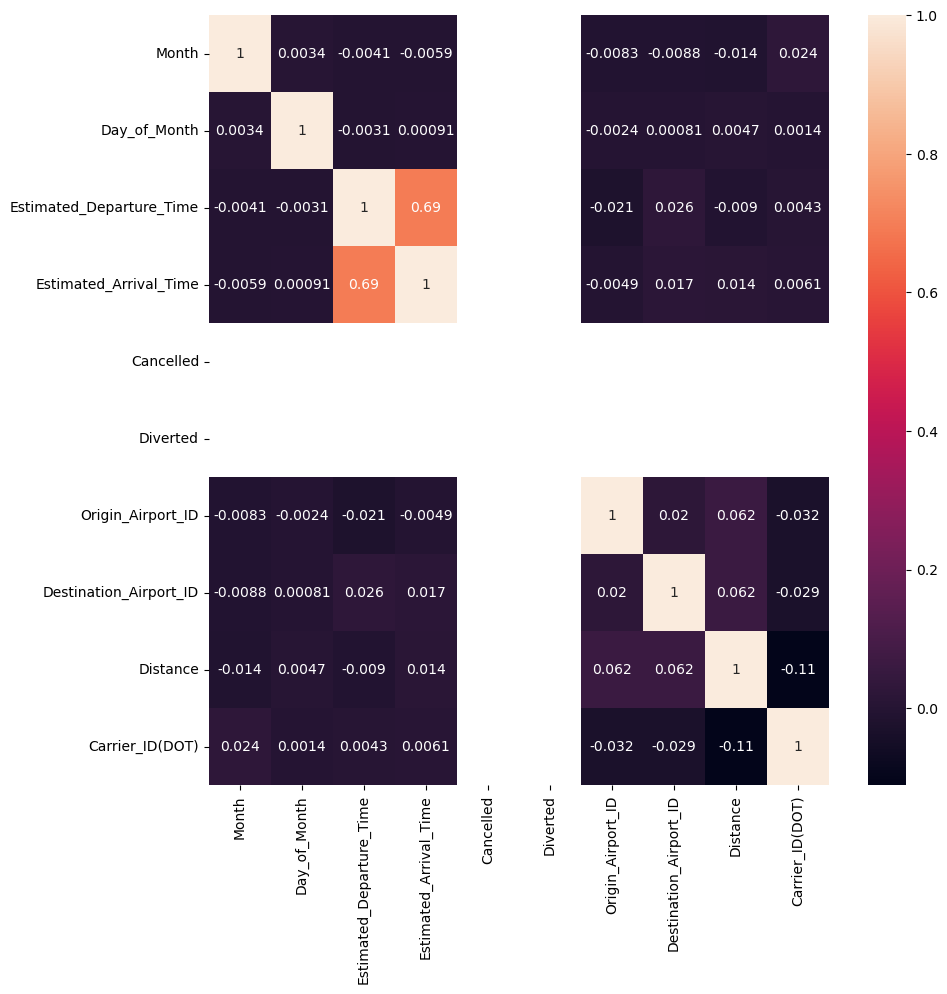

In [41]:
#상관계수 시각화
plt.figure(figsize = (10, 10))
sns.heatmap(data = air_df.corr(), annot=True)

In [14]:
air['Cancelled'].unique() #값이 하나

array([0], dtype=int64)

In [15]:
air['Diverted'].unique() #값이 하나

array([0], dtype=int64)

#### - `Estimated_Departure_Time`와 `Estimated_Arrival_Time` 간의 상관관계가 높다는 사실을 알 수 있다.

### 1-3) 변수별 분포 확인 

In [20]:
air.columns

Index(['ID', 'Month', 'Day_of_Month', 'Estimated_Departure_Time',
       'Estimated_Arrival_Time', 'Cancelled', 'Diverted', 'Origin_Airport',
       'Origin_Airport_ID', 'Origin_State', 'Destination_Airport',
       'Destination_Airport_ID', 'Destination_State', 'Distance', 'Airline',
       'Carrier_Code(IATA)', 'Carrier_ID(DOT)', 'Tail_Number', 'Delay'],
      dtype='object')

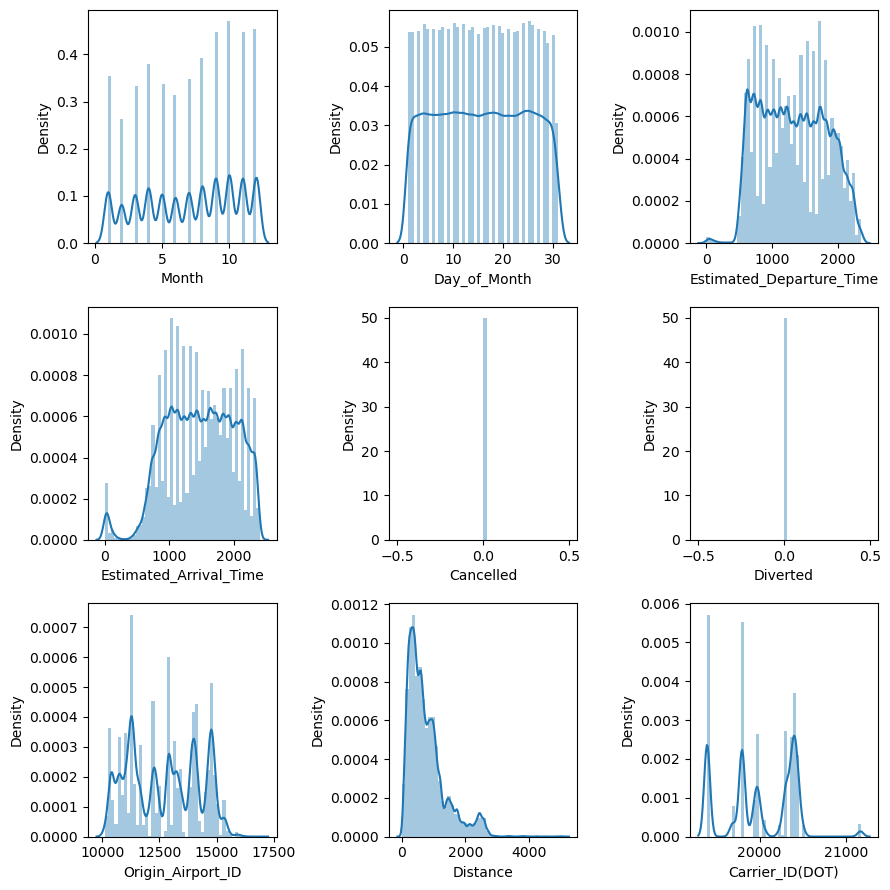

In [74]:
#각 컬럼별 분포 확인
#숫자형이 아닌 컬럼 제외
air_num = air_df[['Month','Day_of_Month','Estimated_Departure_Time','Estimated_Arrival_Time','Cancelled','Diverted','Origin_Airport_ID','Distance','Carrier_ID(DOT)']]

plt.figure(figsize=(9, 9))
for i in range(9):
    plt.subplot(3, 3, i+1)
    sns.distplot(air_num.iloc[:, i])
plt.tight_layout()
plt.show()

### - Delay 컬럼 수치화

In [49]:
air_df['Delay'].unique()

array(['Not_Delayed', 'Delayed'], dtype=object)

In [11]:
#Delay 컬럼 수치화 해주기 위함
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder()

In [12]:
encoded_delay = onehot_encoder.fit_transform(air_df['Delay'].values.reshape(-1,1)) 

In [13]:
onehot_encoder.categories_[0]

array(['Delayed', 'Not_Delayed'], dtype=object)

In [14]:
air_df['Delay'] = encoded_delay.toarray()

In [15]:
air_df

,ID,Month,Day_of_Month,Estimated_Departure_Time,Estimated_Arrival_Time,Cancelled,Diverted,Origin_Airport,Origin_Airport_ID,Origin_State,Destination_Airport,Destination_Airport_ID,Destination_State,Distance,Airline,Carrier_Code(IATA),Carrier_ID(DOT),Tail_Number,Delay
5,TRAIN_000005,4,13,1545.0,NaN,0,0,EWR,11618,NaN,DCA,11278,Virginia,199.0,Republic Airlines,UA,20452.0,N657RW,0.0
6,TRAIN_000006,1,20,1742.0,1903.0,0,0,EWR,11618,New Jersey,BOS,10721,Massachusetts,200.0,United Air Lines Inc.,UA,NaN,N66825,0.0
8,TRAIN_000008,6,13,1420.0,1550.0,0,0,BWI,10821,NaN,CLT,11057,North Carolina,361.0,Southwest Airlines Co.,WN,19393.0,N765SW,0.0
10,TRAIN_000010,8,13,1730.0,1844.0,0,0,DCA,11278,Virginia,PIT,14122,Pennsylvania,204.0,Republic Airlines,AA,NaN,N119HQ,1.0
12,TRAIN_000012,1,12,1015.0,1145.0,0,0,CLE,11042,Ohio,DEN,11292,Colorado,1201.0,Southwest Airlines Co.,WN,NaN,N8696E,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999962,TRAIN_999962,10,11,NaN,2003.0,0,0,SAT,14683,Texas,ORD,13930,Illinois,1041.0,SkyWest Airlines Inc.,UA,20304.0,N152SY,0.0
999963,TRAIN_999963,5,2,1759.0,1926.0,0,0,LGA,12953,New York,DCA,11278,Virginia,214.0,NaN,DL,20452.0,N871RW,1.0
999969,TRAIN_999969,10,10,940.0,1056.0,0,0,MFE,13256,Texas,IAH,12266,Texas,316.0,Mesa Airlines Inc.,NaN,20378.0,N89321,1.0
999985,TRAIN_999985,8,8,1914.0,2039.0,0,0,RDU,14492,North Carolina,JAX,12451,Florida,407.0,Frontier Airlines Inc.,F9,20436.0,N316FR,0.0


In [16]:
air_df['Delay'].value_counts()
#0: Not_Delayed
#1: Delayed

0.0    210001
1.0     45000
Name: Delay, dtype: int64

### - 변수 간 상관관계 재확인 

<AxesSubplot:>

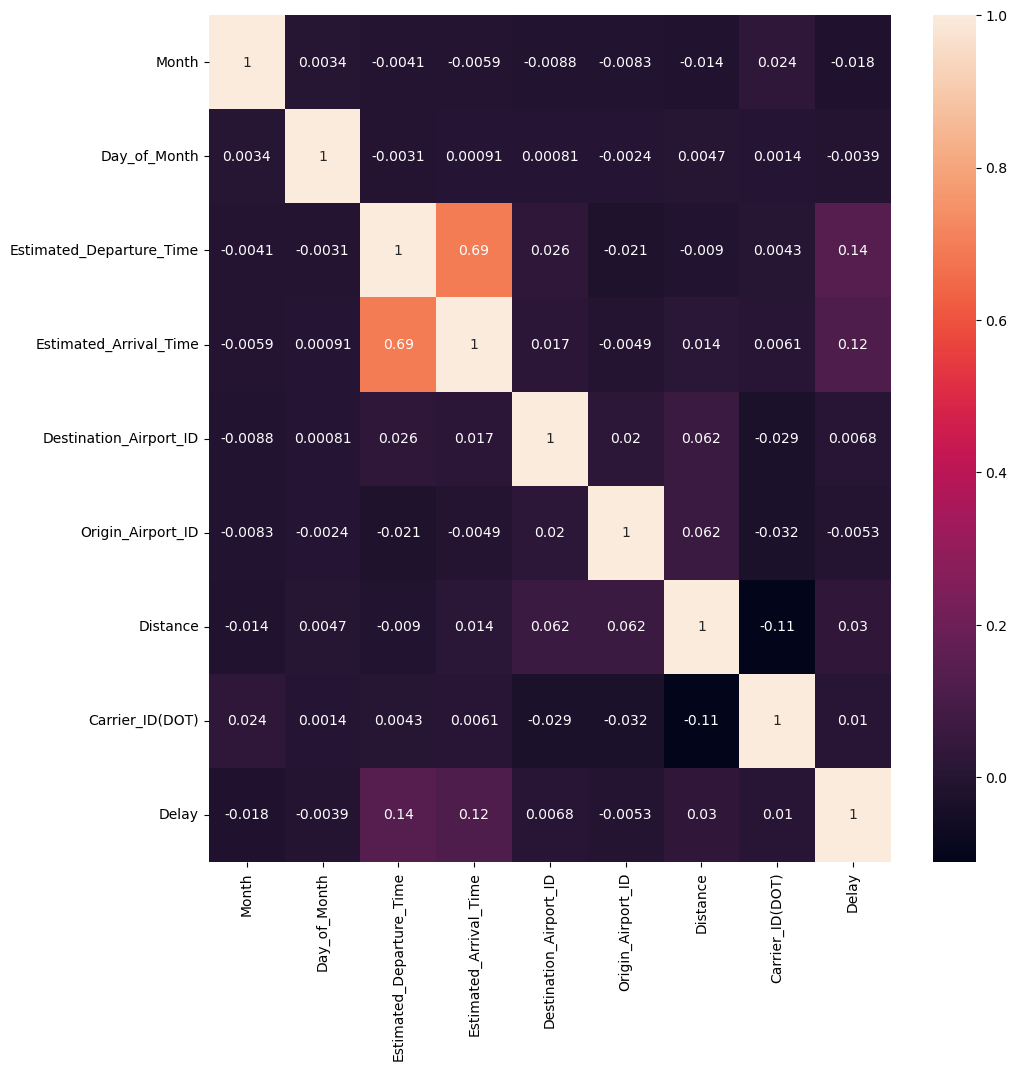

In [23]:
#상관계수 시각화
plt.figure(figsize = (11, 11))
sns.heatmap(data = air_df[['Month','Day_of_Month','Estimated_Departure_Time','Estimated_Arrival_Time','Destination_Airport_ID','Origin_Airport_ID','Distance','Carrier_ID(DOT)','Delay']].corr(), annot=True)

- Delay 컬럼과 가장 큰 선형관계를 보이는 것은 Estimated_Departure_Time과 Estimated_Arrival_Time이다. 
- 하지만 이 마저도, 유의미한 선형관계를 갖는다고는 말 할 수 없다.

## 2) 통계분석
- 유의미한 컬럼별로 정규성 검정
- 상관계수 등을 통한 변수 간의 관계 정리(위에서 완료)

#### 2-1) 범주형 변수 처리
#### 2-2) 사용하지 않을 변수 제거
#### 2-3) 결측치 처리
#### 2-4) 데이터 변환
#### 2-5) 스케일링

---

### 2-1) 범주형 변수 처리
- 유의미 해 보이는 것

#### 2-1-1) Origin_State
#### 2-1-2) Destination_State

- 라벨 인코딩은 이 데이터에 적합하지 않고(순서가 없어서),
- 원핫 인코딩은 변수의 수가 너무 많아지기 때문에 사용하지 않았다.

- 하여, 이진 인코딩(Binary Encoding)을 사용하였다.
- 이진 인코딩은 범주형 변수를 이진수로 변환하는 방법이다.
- 각 유니크한 값을 이진수로 표현하여 새로운 열(변수)을 생성한다. 
- 이 방법은 원핫 인코딩보다 변수의 개수가 적어 차원의 저주 문제를 해결할 수 있다.

### 2-1-1) Origin_State

In [19]:
# 이진 인코딩-1
from category_encoders import BinaryEncoder

encoder = BinaryEncoder(cols=['Origin_State'])
df_encoded = encoder.fit_transform(air_df)

In [21]:
air_df = df_encoded 
air_df

,ID,Month,Day_of_Month,Estimated_Departure_Time,Estimated_Arrival_Time,Cancelled,Diverted,Origin_Airport,Origin_Airport_ID,Origin_State_0,...,Origin_State_5,Destination_Airport,Destination_Airport_ID,Destination_State,Distance,Airline,Carrier_Code(IATA),Carrier_ID(DOT),Tail_Number,Delay
5,TRAIN_000005,4,13,1545.0,NaN,0,0,EWR,11618,0,...,1,DCA,11278,Virginia,199.0,Republic Airlines,UA,20452.0,N657RW,0.0
6,TRAIN_000006,1,20,1742.0,1903.0,0,0,EWR,11618,0,...,0,BOS,10721,Massachusetts,200.0,United Air Lines Inc.,UA,NaN,N66825,0.0
8,TRAIN_000008,6,13,1420.0,1550.0,0,0,BWI,10821,0,...,1,CLT,11057,North Carolina,361.0,Southwest Airlines Co.,WN,19393.0,N765SW,0.0
10,TRAIN_000010,8,13,1730.0,1844.0,0,0,DCA,11278,0,...,1,PIT,14122,Pennsylvania,204.0,Republic Airlines,AA,NaN,N119HQ,1.0
12,TRAIN_000012,1,12,1015.0,1145.0,0,0,CLE,11042,0,...,0,DEN,11292,Colorado,1201.0,Southwest Airlines Co.,WN,NaN,N8696E,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999962,TRAIN_999962,10,11,NaN,2003.0,0,0,SAT,14683,0,...,1,ORD,13930,Illinois,1041.0,SkyWest Airlines Inc.,UA,20304.0,N152SY,0.0
999963,TRAIN_999963,5,2,1759.0,1926.0,0,0,LGA,12953,0,...,0,DCA,11278,Virginia,214.0,NaN,DL,20452.0,N871RW,1.0
999969,TRAIN_999969,10,10,940.0,1056.0,0,0,MFE,13256,0,...,1,IAH,12266,Texas,316.0,Mesa Airlines Inc.,NaN,20378.0,N89321,1.0
999985,TRAIN_999985,8,8,1914.0,2039.0,0,0,RDU,14492,0,...,0,JAX,12451,Florida,407.0,Frontier Airlines Inc.,F9,20436.0,N316FR,0.0


In [22]:
air_df.columns

Index(['ID', 'Month', 'Day_of_Month', 'Estimated_Departure_Time',
       'Estimated_Arrival_Time', 'Cancelled', 'Diverted', 'Origin_Airport',
       'Origin_Airport_ID', 'Origin_State_0', 'Origin_State_1',
       'Origin_State_2', 'Origin_State_3', 'Origin_State_4', 'Origin_State_5',
       'Destination_Airport', 'Destination_Airport_ID', 'Destination_State',
       'Distance', 'Airline', 'Carrier_Code(IATA)', 'Carrier_ID(DOT)',
       'Tail_Number', 'Delay'],
      dtype='object')

### 2-1-2) Destination_State

In [23]:
# 이진 인코딩-2
from category_encoders import BinaryEncoder

encoder = BinaryEncoder(cols=['Destination_State'])
air_df = encoder.fit_transform(air_df)

In [24]:
air_df

,ID,Month,Day_of_Month,Estimated_Departure_Time,Estimated_Arrival_Time,Cancelled,Diverted,Origin_Airport,Origin_Airport_ID,Origin_State_0,...,Destination_State_2,Destination_State_3,Destination_State_4,Destination_State_5,Distance,Airline,Carrier_Code(IATA),Carrier_ID(DOT),Tail_Number,Delay
5,TRAIN_000005,4,13,1545.0,NaN,0,0,EWR,11618,0,...,0,0,0,1,199.0,Republic Airlines,UA,20452.0,N657RW,0.0
6,TRAIN_000006,1,20,1742.0,1903.0,0,0,EWR,11618,0,...,0,0,1,0,200.0,United Air Lines Inc.,UA,NaN,N66825,0.0
8,TRAIN_000008,6,13,1420.0,1550.0,0,0,BWI,10821,0,...,0,0,1,1,361.0,Southwest Airlines Co.,WN,19393.0,N765SW,0.0
10,TRAIN_000010,8,13,1730.0,1844.0,0,0,DCA,11278,0,...,0,1,0,0,204.0,Republic Airlines,AA,NaN,N119HQ,1.0
12,TRAIN_000012,1,12,1015.0,1145.0,0,0,CLE,11042,0,...,0,1,0,1,1201.0,Southwest Airlines Co.,WN,NaN,N8696E,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999962,TRAIN_999962,10,11,NaN,2003.0,0,0,SAT,14683,0,...,0,0,0,1,1041.0,SkyWest Airlines Inc.,UA,20304.0,N152SY,0.0
999963,TRAIN_999963,5,2,1759.0,1926.0,0,0,LGA,12953,0,...,0,0,0,1,214.0,NaN,DL,20452.0,N871RW,1.0
999969,TRAIN_999969,10,10,940.0,1056.0,0,0,MFE,13256,0,...,0,0,1,1,316.0,Mesa Airlines Inc.,NaN,20378.0,N89321,1.0
999985,TRAIN_999985,8,8,1914.0,2039.0,0,0,RDU,14492,0,...,1,1,1,1,407.0,Frontier Airlines Inc.,F9,20436.0,N316FR,0.0


In [25]:
air_df.columns

Index(['ID', 'Month', 'Day_of_Month', 'Estimated_Departure_Time',
       'Estimated_Arrival_Time', 'Cancelled', 'Diverted', 'Origin_Airport',
       'Origin_Airport_ID', 'Origin_State_0', 'Origin_State_1',
       'Origin_State_2', 'Origin_State_3', 'Origin_State_4', 'Origin_State_5',
       'Destination_Airport', 'Destination_Airport_ID', 'Destination_State_0',
       'Destination_State_1', 'Destination_State_2', 'Destination_State_3',
       'Destination_State_4', 'Destination_State_5', 'Distance', 'Airline',
       'Carrier_Code(IATA)', 'Carrier_ID(DOT)', 'Tail_Number', 'Delay'],
      dtype='object')

In [26]:
air_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 255001 entries, 5 to 999992
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        255001 non-null  object 
 1   Month                     255001 non-null  int64  
 2   Day_of_Month              255001 non-null  int64  
 3   Estimated_Departure_Time  227160 non-null  float64
 4   Estimated_Arrival_Time    227317 non-null  float64
 5   Cancelled                 255001 non-null  int64  
 6   Diverted                  255001 non-null  int64  
 7   Origin_Airport            255001 non-null  object 
 8   Origin_Airport_ID         255001 non-null  int64  
 9   Origin_State_0            255001 non-null  int64  
 10  Origin_State_1            255001 non-null  int64  
 11  Origin_State_2            255001 non-null  int64  
 12  Origin_State_3            255001 non-null  int64  
 13  Origin_State_4            255001 non-null  int64 

### 2-2) 사용하지 않을 변수 제거

- `ID, Origin_Airport, Destination_Airport, Airline, Carrier_Code(IATA),Tail_Number` 컬럼은 크게 의미가 없거나, 다른 변수와 의미가 중복되어 중복 정보를 제공할 가능성이 있다고 판단하여 해당 컬럼을 제거하기로 결정하였다.

- `Cancelled, Diverted` 컬럼은 값이 0 하나로, 예측 모델에 도움을 주지 않을 것 같아 제거하기로 하였다.

In [12]:
air_df_fin = air_df.drop(['ID','Origin_Airport','Destination_Airport','Airline','Carrier_Code(IATA)','Tail_Number','Cancelled','Diverted'], axis=1)
air_df_fin

,Month,Day_of_Month,Estimated_Departure_Time,Estimated_Arrival_Time,Origin_Airport_ID,Origin_State_0,Origin_State_1,Origin_State_2,Origin_State_3,Origin_State_4,...,Destination_Airport_ID,Destination_State_0,Destination_State_1,Destination_State_2,Destination_State_3,Destination_State_4,Destination_State_5,Distance,Carrier_ID(DOT),Delay
0,4,13,1545.0,NaN,11618,0,0,0,0,0,...,11278,0,0,0,0,0,1,199.0,20452.0,0.0
1,1,20,1742.0,1903.0,11618,0,0,0,0,1,...,10721,0,0,0,0,1,0,200.0,NaN,0.0
2,6,13,1420.0,1550.0,10821,0,0,0,0,0,...,11057,0,0,0,0,1,1,361.0,19393.0,0.0
3,8,13,1730.0,1844.0,11278,0,0,0,0,1,...,14122,0,0,0,1,0,0,204.0,NaN,1.0
4,1,12,1015.0,1145.0,11042,0,0,0,1,0,...,11292,0,0,0,1,0,1,1201.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254996,10,11,NaN,2003.0,14683,0,0,0,1,0,...,13930,0,1,0,0,0,1,1041.0,20304.0,0.0
254997,5,2,1759.0,1926.0,12953,0,0,1,1,0,...,11278,0,0,0,0,0,1,214.0,20452.0,1.0
254998,10,10,940.0,1056.0,13256,0,0,0,1,0,...,12266,0,1,0,0,1,1,316.0,20378.0,1.0
254999,8,8,1914.0,2039.0,14492,0,1,0,0,0,...,12451,0,0,1,1,1,1,407.0,20436.0,0.0


In [13]:
air_df_fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255001 entries, 0 to 255000
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     255001 non-null  int64  
 1   Day_of_Month              255001 non-null  int64  
 2   Estimated_Departure_Time  227160 non-null  float64
 3   Estimated_Arrival_Time    227317 non-null  float64
 4   Origin_Airport_ID         255001 non-null  int64  
 5   Origin_State_0            255001 non-null  int64  
 6   Origin_State_1            255001 non-null  int64  
 7   Origin_State_2            255001 non-null  int64  
 8   Origin_State_3            255001 non-null  int64  
 9   Origin_State_4            255001 non-null  int64  
 10  Origin_State_5            255001 non-null  int64  
 11  Destination_Airport_ID    255001 non-null  int64  
 12  Destination_State_0       255001 non-null  int64  
 13  Destination_State_1       255001 non-null  i

### 2-3) 결측치 처리

In [14]:
air_df_fin.isnull().sum()

Month                           0
Day_of_Month                    0
Estimated_Departure_Time    27841
Estimated_Arrival_Time      27684
Origin_Airport_ID               0
Origin_State_0                  0
Origin_State_1                  0
Origin_State_2                  0
Origin_State_3                  0
Origin_State_4                  0
Origin_State_5                  0
Destination_Airport_ID          0
Destination_State_0             0
Destination_State_1             0
Destination_State_2             0
Destination_State_3             0
Destination_State_4             0
Destination_State_5             0
Distance                        0
Carrier_ID(DOT)             27770
Delay                           0
dtype: int64

- `Estimated_Departure_Time, Estimated_Arrival_Time, Carrier_ID(DOT)` 컬럼 결측치 존재

#### 2-3-1) Estimated_Departure_Time 결측치 채우기
#### 2-3-2) Estimated_Arrival_Time 결측치 채우기
#### 2-3-3) Carrier_ID(DOT) 결측치 채우기

### 2-3-1) Estimated_Departure_Time 결측치 채우기

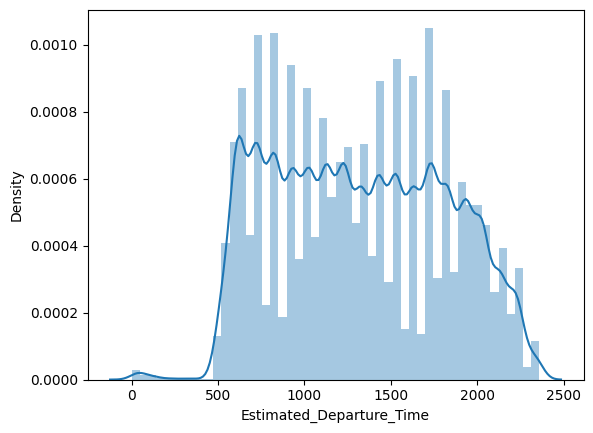

In [29]:
sns.distplot(air_df_fin['Estimated_Departure_Time'])
plt.show()

- Estimated_Departure_Time 변수에서 결측치가 있는 경우, Destination_Airport_ID 변수에서 랜덤으로 추출한 값으로 대체
- Estimated_Departure_Time 컬럼과 가장 상관관계가 나은 Destination_Airport_ID 컬럼 사용.

In [66]:
# 결측치 처리
for DAI in air_df_fin["Destination_Airport_ID"].unique():
    EDT_mean = air_df_fin.loc[air_df_fin["Destination_Airport_ID"] == DAI, "Estimated_Departure_Time"].mean()
    EDT_std = air_df_fin.loc[air_df_fin["Destination_Airport_ID"] == DAI, "Estimated_Departure_Time"].std()
    EDT_null_count = air_df_fin.loc[(air_df_fin["Destination_Airport_ID"] == DAI) & (air_df_fin["Estimated_Departure_Time"].isna()), "Estimated_Departure_Time"].shape[0]
    
    EDT_mean = int(EDT_mean)
    if np.isnan(EDT_std):
        EDT_std = 0
    else:
        EDT_std = int(EDT_std)
    
    if EDT_std == 0:
        EDT_null_random_list = np.full((EDT_null_count,), EDT_mean)
    else:
        EDT_null_random_list = np.random.randint(int(EDT_mean - EDT_std), int(EDT_mean + EDT_std), size=EDT_null_count)
    
    air_df_fin.loc[(air_df_fin["Destination_Airport_ID"] == DAI) & (air_df_fin["Estimated_Departure_Time"].isna()), "Estimated_Departure_Time"] = EDT_null_random_list


### 2-3-2) Estimated_Arrival_Time 결측치 채우기

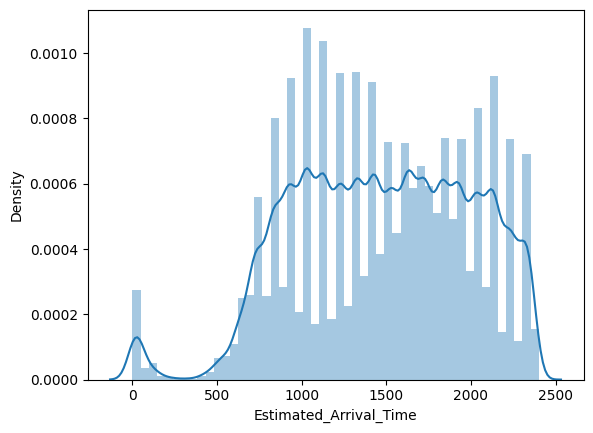

In [30]:
sns.distplot(air_df_fin['Estimated_Arrival_Time'])
plt.show()

- Estimated_Arrival_Time 변수에서 결측치가 있는 경우, Destination_Airport_ID 변수에서 랜덤으로 추출한 값으로 대체
- Estimated_Arrival_Time 컬럼과 가장 상관관계가 나은 Destination_Airport_ID 컬럼 사용.

In [69]:
# 결측치 처리
for DAI in air_df_fin["Destination_Airport_ID"].unique():
    EDT_mean = air_df_fin.loc[air_df_fin["Destination_Airport_ID"] == DAI, "Estimated_Arrival_Time"].mean()
    EDT_std = air_df_fin.loc[air_df_fin["Destination_Airport_ID"] == DAI, "Estimated_Arrival_Time"].std()
    EDT_null_count = air_df_fin.loc[(air_df_fin["Destination_Airport_ID"] == DAI) & (air_df_fin["Estimated_Arrival_Time"].isna()), "Estimated_Arrival_Time"].shape[0]
    
    EDT_mean = int(EDT_mean)
    if np.isnan(EDT_std):
        EDT_std = 0
    else:
        EDT_std = int(EDT_std)
    
    if EDT_std == 0:
        EDT_null_random_list = np.full((EDT_null_count,), EDT_mean)
    else:
        EDT_null_random_list = np.random.randint(int(EDT_mean - EDT_std), int(EDT_mean + EDT_std), size=EDT_null_count)
    
    air_df_fin.loc[(air_df_fin["Destination_Airport_ID"] == DAI) & (air_df_fin["Estimated_Arrival_Time"].isna()), "Estimated_Arrival_Time"] = EDT_null_random_list


### 2-3-3) Carrier_ID(DOT) 결측치

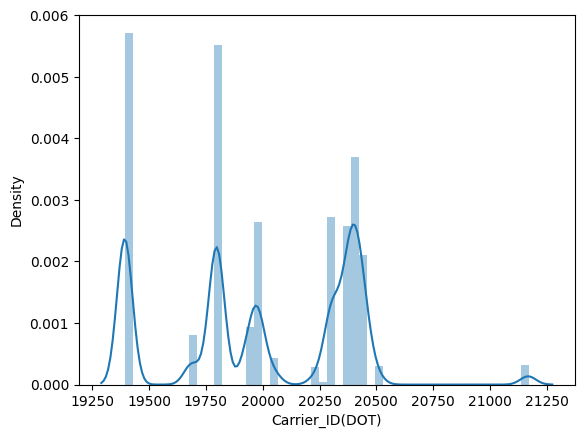

In [28]:
sns.distplot(air_df_fin['Carrier_ID(DOT)'])
plt.show()

- 해당 항공편을 운항하는 항공사의 고유 ID는 최빈값으로 결측치 대체

In [72]:
air_df_fin['Carrier_ID(DOT)'].mode()

0    19393.0
Name: Carrier_ID(DOT), dtype: float64

In [73]:
# 결측치 처리
air_df_fin['Carrier_ID(DOT)'] = air_df_fin['Carrier_ID(DOT)'].fillna(value=19393.0)

In [74]:
# 대체된 결측치 확인
print(air_df_fin.isna().sum())

Month                       0
Day_of_Month                0
Estimated_Departure_Time    0
Estimated_Arrival_Time      0
Origin_Airport_ID           0
Origin_State_0              0
Origin_State_1              0
Origin_State_2              0
Origin_State_3              0
Origin_State_4              0
Origin_State_5              0
Destination_Airport_ID      0
Destination_State_0         0
Destination_State_1         0
Destination_State_2         0
Destination_State_3         0
Destination_State_4         0
Destination_State_5         0
Distance                    0
Carrier_ID(DOT)             0
Delay                       0
dtype: int64


In [75]:
air_df_fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255001 entries, 0 to 255000
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     255001 non-null  int64  
 1   Day_of_Month              255001 non-null  int64  
 2   Estimated_Departure_Time  255001 non-null  float64
 3   Estimated_Arrival_Time    255001 non-null  float64
 4   Origin_Airport_ID         255001 non-null  int64  
 5   Origin_State_0            255001 non-null  int64  
 6   Origin_State_1            255001 non-null  int64  
 7   Origin_State_2            255001 non-null  int64  
 8   Origin_State_3            255001 non-null  int64  
 9   Origin_State_4            255001 non-null  int64  
 10  Origin_State_5            255001 non-null  int64  
 11  Destination_Airport_ID    255001 non-null  int64  
 12  Destination_State_0       255001 non-null  int64  
 13  Destination_State_1       255001 non-null  i

- 모든 결측치 처리 완료

### 2-4) 데이터 변환

- `Distance` 변수의 분포가 왼쪽으로 치우쳐져 있어서, 로그 변환의 필요성을 느꼈다.

- 다른 변수들은 데이터 변환의 필요성을 크게 느끼지 못했다.

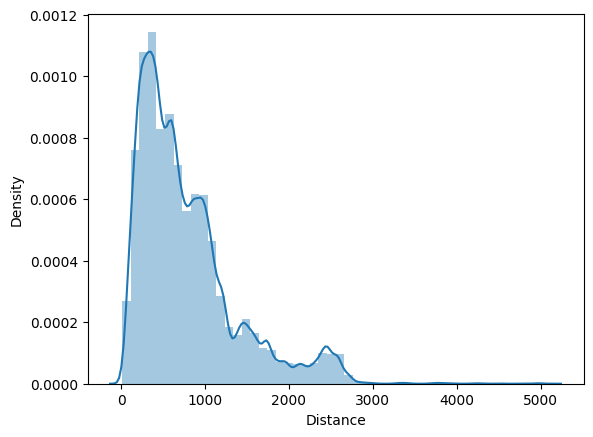

In [78]:
sns.distplot(air_df_fin['Distance'])
plt.show()

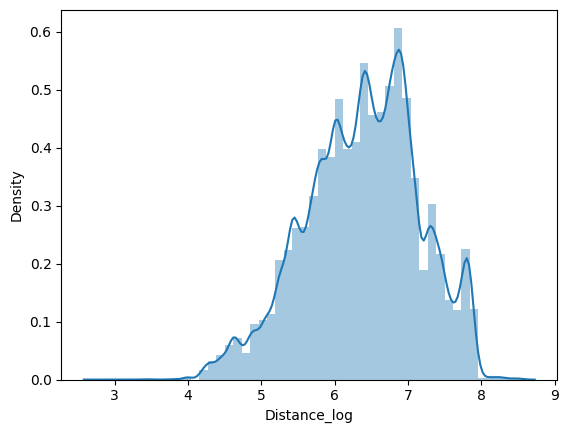

In [79]:
# Distance 컬럼에 로그 변환 적용
air_df_fin['Distance_log'] = np.log(air_df_fin['Distance'])
sns.distplot(air_df_fin['Distance_log'])
plt.show()

In [80]:
df = air_df_fin.drop('Distance', axis=1)
df

,Month,Day_of_Month,Estimated_Departure_Time,Estimated_Arrival_Time,Origin_Airport_ID,Origin_State_0,Origin_State_1,Origin_State_2,Origin_State_3,Origin_State_4,...,Destination_Airport_ID,Destination_State_0,Destination_State_1,Destination_State_2,Destination_State_3,Destination_State_4,Destination_State_5,Carrier_ID(DOT),Delay,Distance_log
0,4,13,1545.0,1866.0,11618,0,0,0,0,0,...,11278,0,0,0,0,0,1,20452.0,0.0,5.293305
1,1,20,1742.0,1903.0,11618,0,0,0,0,1,...,10721,0,0,0,0,1,0,19393.0,0.0,5.298317
2,6,13,1420.0,1550.0,10821,0,0,0,0,0,...,11057,0,0,0,0,1,1,19393.0,0.0,5.888878
3,8,13,1730.0,1844.0,11278,0,0,0,0,1,...,14122,0,0,0,1,0,0,19393.0,1.0,5.318120
4,1,12,1015.0,1145.0,11042,0,0,0,1,0,...,11292,0,0,0,1,0,1,19393.0,0.0,7.090910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254996,10,11,927.0,2003.0,14683,0,0,0,1,0,...,13930,0,1,0,0,0,1,20304.0,0.0,6.947937
254997,5,2,1759.0,1926.0,12953,0,0,1,1,0,...,11278,0,0,0,0,0,1,20452.0,1.0,5.365976
254998,10,10,940.0,1056.0,13256,0,0,0,1,0,...,12266,0,1,0,0,1,1,20378.0,1.0,5.755742
254999,8,8,1914.0,2039.0,14492,0,1,0,0,0,...,12451,0,0,1,1,1,1,20436.0,0.0,6.008813


### 2-5) 스케일링

## 3) 분석 모델링
- Delay를 예측하는 분류 모델링
- 정확도, f1스코어, precision, recall 사용하여 최적의 모델링 선정
- 하이퍼파라미터 사용


In [82]:
df.to_csv('air_df_fin_final.csv', index = False)

In [83]:
df = pd.read_csv('air_df_fin.csv')

In [84]:
df

,Month,Day_of_Month,Estimated_Departure_Time,Estimated_Arrival_Time,Origin_Airport_ID,Origin_State_0,Origin_State_1,Origin_State_2,Origin_State_3,Origin_State_4,...,Destination_Airport_ID,Destination_State_0,Destination_State_1,Destination_State_2,Destination_State_3,Destination_State_4,Destination_State_5,Distance,Carrier_ID(DOT),Delay
0,4,13,1545.0,1866.0,11618,0,0,0,0,0,...,11278,0,0,0,0,0,1,199.0,20452.0,0.0
1,1,20,1742.0,1903.0,11618,0,0,0,0,1,...,10721,0,0,0,0,1,0,200.0,19393.0,0.0
2,6,13,1420.0,1550.0,10821,0,0,0,0,0,...,11057,0,0,0,0,1,1,361.0,19393.0,0.0
3,8,13,1730.0,1844.0,11278,0,0,0,0,1,...,14122,0,0,0,1,0,0,204.0,19393.0,1.0
4,1,12,1015.0,1145.0,11042,0,0,0,1,0,...,11292,0,0,0,1,0,1,1201.0,19393.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254996,10,11,927.0,2003.0,14683,0,0,0,1,0,...,13930,0,1,0,0,0,1,1041.0,20304.0,0.0
254997,5,2,1759.0,1926.0,12953,0,0,1,1,0,...,11278,0,0,0,0,0,1,214.0,20452.0,1.0
254998,10,10,940.0,1056.0,13256,0,0,0,1,0,...,12266,0,1,0,0,1,1,316.0,20378.0,1.0
254999,8,8,1914.0,2039.0,14492,0,1,0,0,0,...,12451,0,0,1,1,1,1,407.0,20436.0,0.0
